Classes d'équivalence finales : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


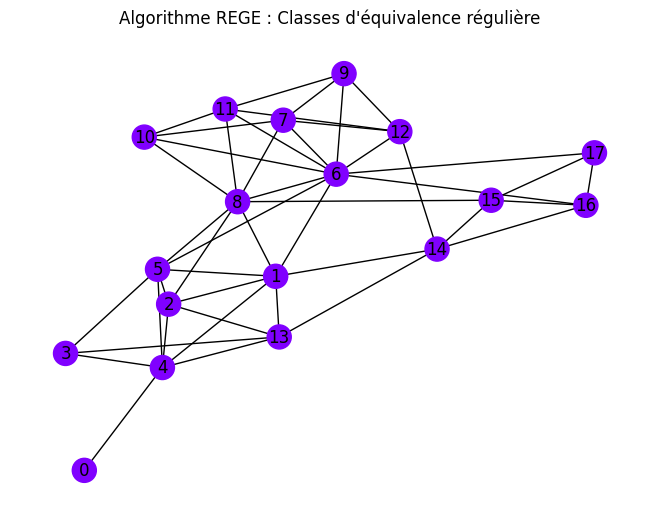

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Exemple de matrice d'adjacence du jeu de données de sampson
adj_matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
])


# Nombre de nœuds
num_nodes = adj_matrix.shape[0]

# Affectation initiale aléatoire des nœuds aux classes d'équivalence
# Ici, nous supposons 2 classes pour simplifier
initial_classes = np.random.randint(2, size=num_nodes)

def calculate_similarity_matrix(adj_matrix, classes):
    num_nodes = adj_matrix.shape[0]
    similarity_matrix = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if classes[i] == classes[j]:
                similarity_matrix[i, j] = np.sum(adj_matrix[i] * adj_matrix[j])
    return similarity_matrix

def update_classes(similarity_matrix, num_classes):
    num_nodes = similarity_matrix.shape[0]
    new_classes = np.zeros(num_nodes, dtype=int)
    for i in range(num_nodes):
        new_classes[i] = np.argmax(np.bincount(similarity_matrix[i].astype(int), minlength=num_classes))
    return new_classes

# Nombre de classes d'équivalence
num_classes = 2

# Affinage itératif
max_iterations = 100
for iteration in range(max_iterations):
    similarity_matrix = calculate_similarity_matrix(adj_matrix, initial_classes)
    new_classes = update_classes(similarity_matrix, num_classes)
    if np.array_equal(initial_classes, new_classes):
        break
    initial_classes = new_classes

# Affectations de classes finales
print("Classes d'équivalence finales :", initial_classes)

# Visualisation
G = nx.from_numpy_array(adj_matrix)
colors = [initial_classes[node] for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.rainbow)
plt.title("Algorithme REGE : Classes d'équivalence régulière")
plt.show()
